In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import math

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pw-experiments-v2/PW_experiment_4phyt_v2.csv
/kaggle/input/pw-experiments/PW_experiment_4phyt.csv


In [3]:
PW_parametric = pd.read_csv("../input/pw-experiments-v2/PW_experiment_4phyt_v2.csv")

In [4]:
PW_parametric.head()

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw
0,1,5600,1200,1250,200,2800,Yes,29,45,36
1,2,5600,1200,625,200,4315,Yes,31,45,36
2,3,5600,1200,1250,200,1400,Yes,26,45,36
3,4,5600,1200,625,200,2915,Yes,28,45,36
4,5,5600,1200,200,200,5165,Yes,33,45,36


In [5]:
l = PW_parametric['l']
h = PW_parametric['h']
w = PW_parametric['w']
g = PW_parametric['g']
OL = PW_parametric['OL']
d = OL + w
Q0 = 2
K0 = 1
Q1 = 1.2088
K1 = 0.2288
PW_parametric['d'] = d
Abs_mat = PW_parametric['Abs_mat']
Measured_Rw = PW_parametric['Measured_Rw']
CompositeGlassRw = PW_parametric['CompositeClosedRw']
DoubleGlassRw = PW_parametric['DoubleGlassClosedRw']

PW_parametric

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365
5,6,5600,1200,100,200,5365,Yes,35,45,36,5465


In [6]:
PW_parametric['sigSA_Yabs'] = ((2*l/1000*h/1000 - 2*w*h/1000000)*0.05) + ((2*g/1000*l/1000+2*g/1000*h/1000)*0.95) + (2*w*h/1000000*0.9)
sigSA_Yabs = PW_parametric['sigSA_Yabs']
PW_parametric['sigSA_Nabs'] = ((2*l/1000*h/1000 - 2*w*h/1000000)*0.03) + ((2*g/1000*l/1000+2*g/1000*h/1000)*0.05) + (2*w*h/1000000*0.9)
sigSA_Nabs = PW_parametric['sigSA_Nabs']
PW_parametric['sigSA_per_sigS_Yabs'] = sigSA_Yabs/((2*l/1000*h/1000 - 2*w*h/1000000)+(2*g/1000*l/1000+2*g/1000*h/1000)+(2*w*h/1000000))
sigSA_per_sigS_Yabs = PW_parametric['sigSA_per_sigS_Yabs']
PW_parametric['sigSA_per_sigS_Nabs'] = sigSA_Nabs/((2*l/1000*h/1000 - 2*w*h/1000000)+(2*g/1000*l/1000+2*g/1000*h/1000)+(2*w*h/1000000))
sigSA_per_sigS_Nabs = PW_parametric['sigSA_per_sigS_Nabs']
PW_parametric

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d,sigSA_Yabs,sigSA_Nabs,sigSA_per_sigS_Yabs,sigSA_per_sigS_Nabs
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050,5.806,3.1492,0.359282,0.194876
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940,4.531,1.8442,0.280384,0.114121
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650,5.806,3.1492,0.359282,0.194876
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540,4.531,1.8442,0.280384,0.114121
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365,3.664,0.9568,0.226733,0.059208
5,6,5600,1200,100,200,5365,Yes,35,45,36,5465,3.460,0.7480,0.214109,0.046287


In [7]:
R_plenum_Yabs = -10*np.log10(w*h/1000000*((Q0*g/1000/(d/1000)/(4*math.pi*(d/1000)**2)+K0*(1-sigSA_per_sigS_Yabs)/sigSA_Yabs)))
R_plenum_Nabs = -10*np.log10(w*h/1000000*((Q0*g/1000/(d/1000)/(4*math.pi*(d/1000)**2)+K0*(1-sigSA_per_sigS_Nabs)/sigSA_Nabs)))
PW_parametric['R_plenum_Well_1'] = np.where(Abs_mat == "Yes", R_plenum_Yabs, R_plenum_Nabs)
R_plenum_Well_1 = PW_parametric['R_plenum_Well_1']
PW_parametric

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d,sigSA_Yabs,sigSA_Nabs,sigSA_per_sigS_Yabs,sigSA_per_sigS_Nabs,R_plenum_Well_1
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050,5.806,3.1492,0.359282,0.194876,7.792373
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940,4.531,1.8442,0.280384,0.114121,9.233104
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650,5.806,3.1492,0.359282,0.194876,7.744392
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540,4.531,1.8442,0.280384,0.114121,9.220741
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365,3.664,0.9568,0.226733,0.059208,12.949906
5,6,5600,1200,100,200,5365,Yes,35,45,36,5465,3.460,0.7480,0.214109,0.046287,15.641598


In [8]:
#Exampleif
def R_plenum_effectAbs(Abs_mat):
  #print(Abs_mat)
  if Abs_mat.name == 'Yes':
    return 5
  else:
    return 7
PW_parametric['R_plenum_Well_1a'] = PW_parametric.apply(lambda x: R_plenum_effectAbs(x), axis=1)
PW_parametric

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d,sigSA_Yabs,sigSA_Nabs,sigSA_per_sigS_Yabs,sigSA_per_sigS_Nabs,R_plenum_Well_1,R_plenum_Well_1a
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050,5.806,3.1492,0.359282,0.194876,7.792373,7
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940,4.531,1.8442,0.280384,0.114121,9.233104,7
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650,5.806,3.1492,0.359282,0.194876,7.744392,7
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540,4.531,1.8442,0.280384,0.114121,9.220741,7
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365,3.664,0.9568,0.226733,0.059208,12.949906,7
5,6,5600,1200,100,200,5365,Yes,35,45,36,5465,3.460,0.7480,0.214109,0.046287,15.641598,7


In [9]:
R_composite_Well_2 = 10*np.log10((l*h/1000000)/((l*h/1000000)/(10**(CompositeGlassRw/10))+(g*h/1000000)/(10**(R_plenum_Well_1/10))))
PW_parametric['R_composite_Well_2'] = R_composite_Well_2
PW_parametric.head()

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d,sigSA_Yabs,sigSA_Nabs,sigSA_per_sigS_Yabs,sigSA_per_sigS_Nabs,R_plenum_Well_1,R_plenum_Well_1a,R_composite_Well_2
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050,5.806,3.1492,0.359282,0.194876,7.792373,7,22.084004
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940,4.531,1.8442,0.280384,0.114121,9.233104,7,23.455938
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650,5.806,3.1492,0.359282,0.194876,7.744392,7,22.037960
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540,4.531,1.8442,0.280384,0.114121,9.220741,7,23.444263
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365,3.664,0.9568,0.226733,0.059208,12.949906,7,26.857305


In [10]:
R_geometric_Yu_3 = 20* np.log10(l/w)
PW_parametric['R_geometric_Yu_3'] = R_geometric_Yu_3

PW_parametric

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d,sigSA_Yabs,sigSA_Nabs,sigSA_per_sigS_Yabs,sigSA_per_sigS_Nabs,R_plenum_Well_1,R_plenum_Well_1a,R_composite_Well_2,R_geometric_Yu_3
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050,5.806,3.1492,0.359282,0.194876,7.792373,7,22.084004,13.025560
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940,4.531,1.8442,0.280384,0.114121,9.233104,7,23.455938,19.046160
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650,5.806,3.1492,0.359282,0.194876,7.744392,7,22.037960,13.025560
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540,4.531,1.8442,0.280384,0.114121,9.220741,7,23.444263,19.046160
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365,3.664,0.9568,0.226733,0.059208,12.949906,7,26.857305,28.943161
5,6,5600,1200,100,200,5365,Yes,35,45,36,5465,3.460,0.7480,0.214109,0.046287,15.641598,7,29.116991,34.963761


In [11]:
R_plenum_Yabs = -10*np.log10(w*h/1000000*((Q1*g/1000/(d/1000)/(4*math.pi*(d/1000)**2)+K1*(1-sigSA_per_sigS_Yabs)/sigSA_Yabs)))
R_plenum_Nabs = -10*np.log10(w*h/1000000*((Q1*g/1000/(d/1000)/(4*math.pi*(d/1000)**2)+K1*(1-sigSA_per_sigS_Nabs)/sigSA_Nabs)))
PW_parametric['R_plenum_Li_4'] = np.where(Abs_mat == "Yes", R_plenum_Yabs, R_plenum_Nabs)
R_plenum_Li_4 = PW_parametric['R_plenum_Li_4']
PW_parametric

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,d,sigSA_Yabs,sigSA_Nabs,sigSA_per_sigS_Yabs,sigSA_per_sigS_Nabs,R_plenum_Well_1,R_plenum_Well_1a,R_composite_Well_2,R_geometric_Yu_3,R_plenum_Li_4
0,1,5600,1200,1250,200,2800,Yes,29,45,36,4050,5.806,3.1492,0.359282,0.194876,7.792373,7,22.084004,13.025560,14.167099
1,2,5600,1200,625,200,4315,Yes,31,45,36,4940,4.531,1.8442,0.280384,0.114121,9.233104,7,23.455938,19.046160,15.626727
2,3,5600,1200,1250,200,1400,Yes,26,45,36,2650,5.806,3.1492,0.359282,0.194876,7.744392,7,22.037960,13.025560,14.042355
3,4,5600,1200,625,200,2915,Yes,28,45,36,3540,4.531,1.8442,0.280384,0.114121,9.220741,7,23.444263,19.046160,15.594234
4,5,5600,1200,200,200,5165,Yes,33,45,36,5365,3.664,0.9568,0.226733,0.059208,12.949906,7,26.857305,28.943161,19.348395
5,6,5600,1200,100,200,5365,Yes,35,45,36,5465,3.460,0.7480,0.214109,0.046287,15.641598,7,29.116991,34.963761,22.040926


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([<matplotlib.axis.YTick at 0x7f5f128f6110>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

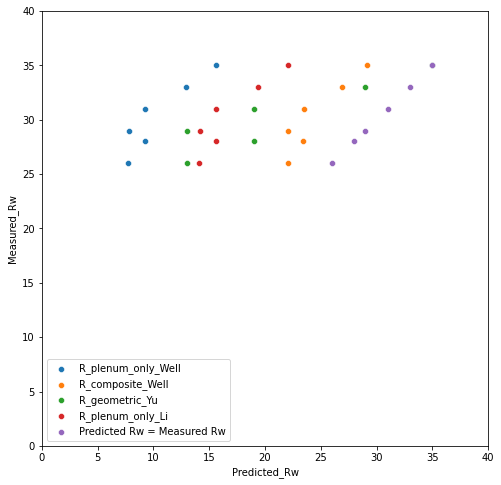

In [12]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=PW_parametric['R_plenum_Well_1'], y=PW_parametric['Measured_Rw'], label='R_plenum_only_Well')
sns.scatterplot(x=PW_parametric['R_composite_Well_2'], y=PW_parametric['Measured_Rw'], label='R_composite_Well')
sns.scatterplot(x=PW_parametric['R_geometric_Yu_3'], y=PW_parametric['Measured_Rw'], label='R_geometric_Yu')
sns.scatterplot(x=PW_parametric['R_plenum_Li_4'], y=PW_parametric['Measured_Rw'], label='R_plenum_only_Li')
sns.scatterplot(PW_parametric['Measured_Rw'], PW_parametric['Measured_Rw'], label='Predicted Rw = Measured Rw')
plt.xlabel("Predicted_Rw")
plt.xticks(np.arange(0, 41, 5))
plt.yticks(np.arange(0, 41, 5))

In [13]:
Diff_Well = abs(R_plenum_Well_1 - Measured_Rw)
Diff_Well_composite = abs(R_composite_Well_2 - Measured_Rw)
Diff_Yu = abs(R_geometric_Yu_3 - Measured_Rw)
Diff_Li = abs(R_plenum_Li_4 - Measured_Rw)

PW_parametric['Diff_Well'] = Diff_Well
PW_parametric['Diff_Well_composite'] = Diff_Well_composite
PW_parametric['Diff_Yu'] = Diff_Yu
PW_parametric['Diff_Li'] = Diff_Li

PW_parametric.head()

,No,l,h,w,g,OL,Abs_mat,Measured_Rw,DoubleGlassClosedRw,CompositeClosedRw,...,sigSA_per_sigS_Nabs,R_plenum_Well_1,R_plenum_Well_1a,R_composite_Well_2,R_geometric_Yu_3,R_plenum_Li_4,Diff_Well,Diff_Well_composite,Diff_Yu,Diff_Li
0,1,5600,1200,1250,200,2800,Yes,29,45,36,...,0.194876,7.792373,7,22.084004,13.025560,14.167099,21.207627,6.915996,15.974440,14.832901
1,2,5600,1200,625,200,4315,Yes,31,45,36,...,0.114121,9.233104,7,23.455938,19.046160,15.626727,21.766896,7.544062,11.953840,15.373273
2,3,5600,1200,1250,200,1400,Yes,26,45,36,...,0.194876,7.744392,7,22.037960,13.025560,14.042355,18.255608,3.962040,12.974440,11.957645
3,4,5600,1200,625,200,2915,Yes,28,45,36,...,0.114121,9.220741,7,23.444263,19.046160,15.594234,18.779259,4.555737,8.953840,12.405766
4,5,5600,1200,200,200,5165,Yes,33,45,36,...,0.059208,12.949906,7,26.857305,28.943161,19.348395,20.050094,6.142695,4.056839,13.651605


In [14]:
print(Diff_Well.agg([np.mean, min, max]))
print(Diff_Well_composite.agg([np.mean, min, max]))
print(Diff_Yu.agg([np.mean, min, max]))
print(Diff_Li.agg([np.mean, min, max]))

mean    19.902981
min     18.255608
max     21.766896
dtype: float64
mean    5.833923
min     3.962040
max     7.544062
dtype: float64
mean     8.991606
min      0.036239
max     15.974440
dtype: float64
mean    13.530044
min     11.957645
max     15.373273
dtype: float64


In [15]:
print(Diff_Well.describe())
print(Diff_Well_composite.describe())
print(Diff_Yu.describe())
print(Diff_Li.describe())

count     6.000000
mean     19.902981
std       1.376305
min      18.255608
25%      18.924045
50%      19.704248
75%      20.918244
max      21.766896
dtype: float64
count    6.000000
mean     5.833923
std      1.366083
min      3.962040
25%      4.887555
50%      6.012852
75%      6.722671
max      7.544062
dtype: float64
count     6.000000
mean      8.991606
std       5.965730
min       0.036239
25%       5.281089
50%      10.453840
75%      12.719290
max      15.974440
dtype: float64
count     6.000000
mean     13.530044
std       1.354412
min      11.957645
25%      12.544093
50%      13.305340
75%      14.537577
max      15.373273
dtype: float64


In [16]:
print(l.describe())
print(h.describe())
print(w.describe())
print(g.describe())
print(OL.describe())
print(Abs_mat.value_counts())
print(Measured_Rw.describe())
print(R_composite_Well_2.describe())

count       6.0
mean     5600.0
std         0.0
min      5600.0
25%      5600.0
50%      5600.0
75%      5600.0
max      5600.0
Name: l, dtype: float64
count       6.0
mean     1200.0
std         0.0
min      1200.0
25%      1200.0
50%      1200.0
75%      1200.0
max      1200.0
Name: h, dtype: float64
count       6.000000
mean      675.000000
std       494.469413
min       100.000000
25%       306.250000
50%       625.000000
75%      1093.750000
max      1250.000000
Name: w, dtype: float64
count      6.0
mean     200.0
std        0.0
min      200.0
25%      200.0
50%      200.0
75%      200.0
max      200.0
Name: g, dtype: float64
count       6.000000
mean     3660.000000
std      1549.406338
min      1400.000000
25%      2828.750000
50%      3615.000000
75%      4952.500000
max      5365.000000
Name: OL, dtype: float64
Yes    6
Name: Abs_mat, dtype: int64
count     6.000000
mean     30.333333
std       3.326660
min      26.000000
25%      28.250000
50%      30.000000
75%      32.5000

In [17]:
h_0 = 1200
w_0 = 600
g_0 = 200
OL_0 = 1400
d_0 = OL_0 + w_0
Abs_0 = 0.4
l_0 = OL_0 + 2*w_0
sigSA_Yabs_0 = ((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_0/1000*l_0/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_0 = sigSA_Yabs_0/((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_0/1000*l_0/1000+2*g_0/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Yabs_0 = -10*np.log10(w_0*h_0/1000000*((2*g_0/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+(1-sigSA_per_sigS_Yabs_0)/sigSA_Yabs_0)))
SingleGlassRw_0 = 22.9
DoubleGlassRw_0 = 34.2
R_composite_Well_0 = 10*np.log10((l_0*h_0/1000000)/(((l_0-w_0)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_0/10))))
R_composite_Well_0

17.04785305148834

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


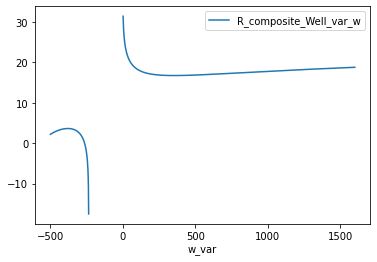

In [18]:
w_add = np.linspace(-1100, 1000, num=1291)
w_var = w_0 + w_add
d_wvar = OL_0 + w_var
l_wvar = OL_0 + 2*w_var
sigSA_Yabs_wvar = ((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)*0.03) + ((2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_var*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_wvar = sigSA_Yabs_wvar/((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)+(2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)+(2*w_var*h_0/1000000))
R_plenum_Yabs_var_w = -10*np.log10(w_var*h_0/1000000*((Q0*g_0/1000/(d_wvar/1000)/(4*math.pi*(d_wvar/1000)**2)+(1-sigSA_per_sigS_Yabs_wvar)/sigSA_Yabs_wvar)))
R_composite_Well_var_w = 10*np.log10((l_wvar*h_0/1000000)/(((l_wvar-w_var)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_var*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_var_w/10))))
sensitivity_w = pd.DataFrame(
                    {"w_var" : w_var, 
                        "R_composite_Well_var_w" : R_composite_Well_var_w.tolist()})   
sensitivity_w.plot(x='w_var',y='R_composite_Well_var_w')

sensitivity_w1 = pd.DataFrame(
                    {"w_add" : w_add, 
                        "R_composite_Well_var_w" : R_composite_Well_var_w.tolist()})   
#sensitivity_w1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


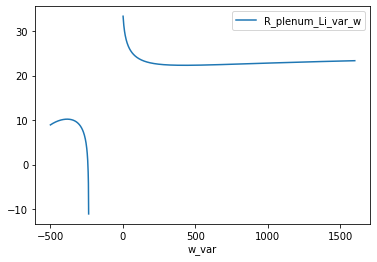

In [19]:
R_plenum_Yabs_var_w_v2 = -10*np.log10(w_var*h_0/1000000*((Q1*g_0/1000/(d_wvar/1000)/(4*math.pi*(d_wvar/1000)**2)+K1*(1-sigSA_per_sigS_Yabs_wvar)/sigSA_Yabs_wvar)))
R_plenum_Li_var_w = 10*np.log10((l_wvar*h_0/1000000)/(((l_wvar-w_var)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_var*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_var_w_v2/10))))
sensitivity_w_v2 = pd.DataFrame(
                    {"w_var" : w_var, 
                        "R_plenum_Li_var_w" : R_plenum_Li_var_w.tolist()})   
sensitivity_w_v2.plot(x='w_var',y='R_plenum_Li_var_w')

sensitivity_w1_v2 = pd.DataFrame(
                    {"w_add" : w_add, 
                        "R_plenum_Li_var_w" : R_plenum_Li_var_w.tolist()}) 

<AxesSubplot:xlabel='h_var'>

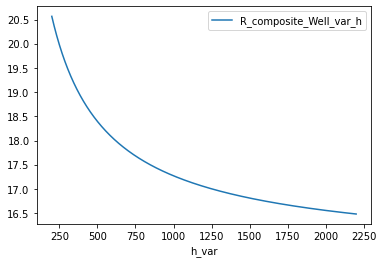

In [20]:
h_add = np.linspace(-1000, 1000, num=1000)
h_var = h_0 + h_add
sigSA_Yabs_hvar = ((2*l_0/1000*h_var/1000 - 2*w_0*h_var/1000000)*0.03) + ((2*g_0/1000*l_0/1000+2*g_0/1000*h_var/1000)*0.5) + (2*w_0*h_var/1000000*0.9)
sigSA_per_sigS_Yabs_hvar = sigSA_Yabs_hvar/((2*l_0/1000*h_var/1000 - 2*w_0*h_var/1000000)+(2*g_0/1000*l_0/1000+2*g_0/1000*h_var/1000)+(2*w_0*h_var/1000000))
R_plenum_Yabs_var_h = -10*np.log10(w_0*h_var/1000000*((2*g_0/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+(1-sigSA_per_sigS_Yabs_hvar)/sigSA_Yabs_hvar)))
R_composite_Well_var_h = 10*np.log10((l_0*h_var/1000000)/(((l_0-w_0)*h_var/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_var/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_var/1000000)/(10**(R_plenum_Yabs_var_h/10))))
sensitivity_h = pd.DataFrame(
                    {"h_var" : h_var, 
                        "R_composite_Well_var_h" : R_composite_Well_var_h})   
sensitivity_h.plot(x='h_var',y='R_composite_Well_var_h')

<AxesSubplot:xlabel='OL_var'>

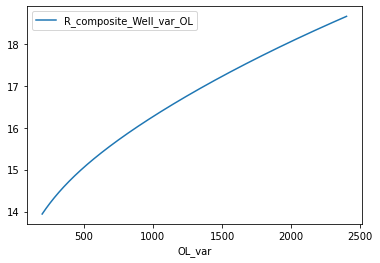

In [21]:
OL_add = np.linspace(-1200, 1000, num=1200)
OL_var = OL_0 + OL_add
d_OLvar = OL_var + w_0
l_OLvar = OL_var + 2*w_0
sigSA_Yabs_OLvar = ((2*l_OLvar/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_0/1000*l_OLvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_OLvar = sigSA_Yabs_OLvar/((2*l_OLvar/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_0/1000*l_OLvar/1000+2*g_0/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Yabs_var_OL = -10*np.log10(w_0*h_0/1000000*((2*g_0/1000/(d_OLvar/1000)/(4*math.pi*(d_OLvar/1000)**2)+(1-sigSA_per_sigS_Yabs_OLvar)/sigSA_Yabs_OLvar)))
R_composite_Well_var_OL = 10*np.log10((l_OLvar*h_0/1000000)/(((l_OLvar-w_0)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_var_OL/10))))
sensitivity_OL = pd.DataFrame(
                    {"OL_var" : OL_var, 
                        "R_composite_Well_var_OL" : R_composite_Well_var_OL})   
sensitivity_OL.plot(x='OL_var',y='R_composite_Well_var_OL')

[-125. -124. -123. -122. -121. -120. -119. -118. -117. -116. -115. -114.
 -113. -112. -111. -110. -109. -108. -107. -106. -105. -104. -103. -102.
 -101. -100.  -99.  -98.  -97.  -96.  -95.  -94.  -93.  -92.  -91.  -90.
  -89.  -88.  -87.  -86.  -85.  -84.  -83.  -82.  -81.  -80.  -79.  -78.
  -77.  -76.  -75.  -74.  -73.  -72.  -71.  -70.  -69.  -68.  -67.  -66.
  -65.  -64.  -63.  -62.  -61.  -60.  -59.  -58.  -57.  -56.  -55.  -54.
  -53.  -52.  -51.  -50.  -49.  -48.  -47.  -46.  -45.  -44.  -43.  -42.
  -41.  -40.  -39.  -38.  -37.  -36.  -35.  -34.  -33.  -32.  -31.  -30.
  -29.  -28.  -27.  -26.  -25.  -24.  -23.  -22.  -21.  -20.  -19.  -18.
  -17.  -16.  -15.  -14.  -13.  -12.  -11.  -10.   -9.   -8.   -7.   -6.
   -5.   -4.   -3.   -2.   -1.    0.    1.    2.    3.    4.    5.    6.
    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.   18.
   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.   30.
   31.   32.   33.   34.   35.   36.   37.   38.   

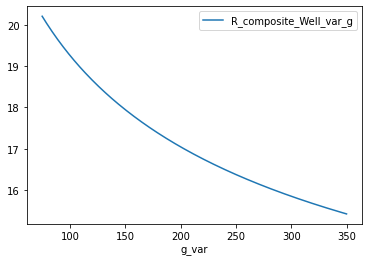

In [22]:
g_add = np.linspace(-125, 150, num=276)
print(g_add)
g_var = g_0 + g_add
sigSA_Yabs_gvar = ((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_var/1000*l_0/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_gvar = sigSA_Yabs_gvar/((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_var/1000*l_0/1000+2*g_var/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Yabs_var_g = -10*np.log10(w_0*h_0/1000000*((2*g_var/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+(1-sigSA_per_sigS_Yabs_gvar)/sigSA_Yabs_gvar)))
R_composite_Well_var_g = 10*np.log10((l_0*h_0/1000000)/(((l_0-w_0)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_var*h_0/1000000)/(10**(R_plenum_Yabs_var_g/10))))
sensitivity_g = pd.DataFrame(
                    {"g_var" : g_var, 
                        "R_composite_Well_var_g" : R_composite_Well_var_g})   
sensitivity_g.plot(x='g_var',y='R_composite_Well_var_g')
sensitivity_g1 = pd.DataFrame(
                    {"g_add" : g_add, 
                        "R_composite_Well_var_g" : R_composite_Well_var_g.tolist()})

In [23]:
mm_add = np.linspace(-1000, 1000, num=2000, dtype=np.int64)

w_var = w_0 + w_add
d_wvar = OL_0 + w_var
l_wvar = OL_0 + 2*w_var
sigSA_Yabs_wvar = ((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)*0.03) + ((2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_var*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_wvar = sigSA_Yabs_wvar/((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)+(2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)+(2*w_var*h_0/1000000))
R_plenum_Yabs_var_w = -10*np.log10(w_var*h_0/1000000*((2*g_0/1000/(d_wvar/1000)/(4*math.pi*(d_wvar/1000)**2)+(1-sigSA_per_sigS_Yabs_wvar)/sigSA_Yabs_wvar)))
R_composite_Well_var_w = 10*np.log10((l_wvar*h_0/1000000)/(((l_wvar-w_var)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_var*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_var_w/10))))

print(R_composite_Well_var_w)

def R_composite_Well_var_w(mm_add):
        if mm_add < w_add or mm_add > w_add:
            return 0
        else:
            return R_composite_Well_var_w
        
print(R_composite_Well_var_w)      

sensitivity = pd.DataFrame(
                    {"mm_add" : mm_add.tolist(), 
                        "R_composite_Well_var_w" : R_composite_Well_var_w}) 

sensitivity.head()

[ 2.2157669   2.25293562  2.28957888 ... 18.80331013 18.80570861
 18.80810538]
<function R_composite_Well_var_w at 0x7f5f104c5a70>


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


,mm_add,R_composite_Well_var_w
0,-1000,<function R_composite_Well_var_w at 0x7f5f104c...
1,-999,<function R_composite_Well_var_w at 0x7f5f104c...
2,-998,<function R_composite_Well_var_w at 0x7f5f104c...
3,-997,<function R_composite_Well_var_w at 0x7f5f104c...
4,-996,<function R_composite_Well_var_w at 0x7f5f104c...


w_0 =  600 mm
h_0 =  1200 mm
g_0 =  200 mm
OL_0 =  1400 mm


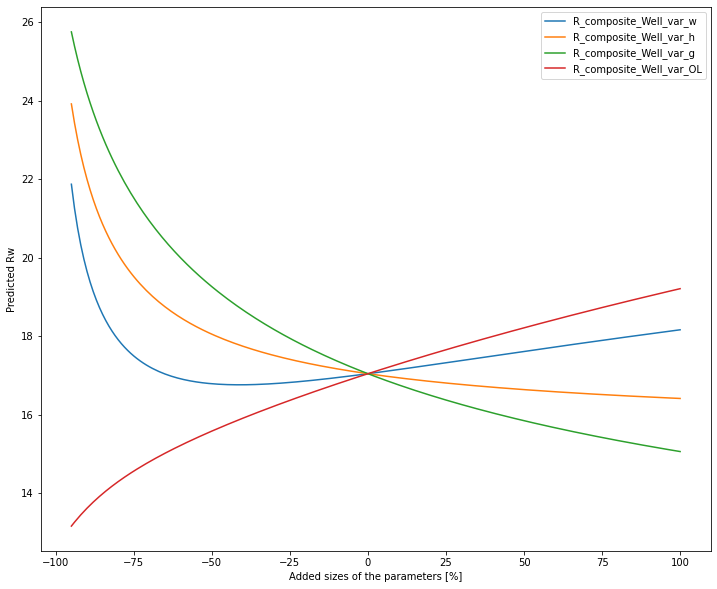

In [24]:
percent_add = np.linspace(-95, 100, num=199, dtype=np.int64)

h_var = h_0 + (percent_add / 100 * h_0)
sigSA_Yabs_hvar = ((2*l_0/1000*h_var/1000 - 2*w_0*h_var/1000000)*0.03) + ((2*g_0/1000*l_0/1000+2*g_0/1000*h_var/1000)*0.5) + (2*w_0*h_var/1000000*0.9)
sigSA_per_sigS_Yabs_hvar = sigSA_Yabs_hvar/((2*l_0/1000*h_var/1000 - 2*w_0*h_var/1000000)+(2*g_0/1000*l_0/1000+2*g_0/1000*h_var/1000)+(2*w_0*h_var/1000000))
R_plenum_Yabs_var_h = -10*np.log10(w_0*h_var/1000000*((2*g_0/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+(1-sigSA_per_sigS_Yabs_hvar)/sigSA_Yabs_hvar)))
R_composite_Well_var_h = 10*np.log10((l_0*h_var/1000000)/(((l_0-w_0)*h_var/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_var/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_var/1000000)/(10**(R_plenum_Yabs_var_h/10))))
sensitivity = pd.DataFrame(
                    {"percent_add" : percent_add.tolist(), 
                        "R_composite_Well_var_h" : R_composite_Well_var_h.tolist()}) 

w_var = w_0 + (percent_add / 100 * w_0)
d_wvar = OL_0 + w_var
l_wvar = OL_0 + 2*w_var
sigSA_Yabs_wvar = ((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)*0.03) + ((2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_var*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_wvar = sigSA_Yabs_wvar/((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)+(2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)+(2*w_var*h_0/1000000))
R_plenum_Yabs_var_w = -10*np.log10(w_var*h_0/1000000*((Q0*g_0/1000/(d_wvar/1000)/(4*math.pi*(d_wvar/1000)**2)+(1-sigSA_per_sigS_Yabs_wvar)/sigSA_Yabs_wvar)))
R_composite_Well_var_w = 10*np.log10((l_wvar*h_0/1000000)/(((l_wvar-w_var)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_var*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_var_w/10))))
sensitivity ['R_composite_Well_var_w'] = R_composite_Well_var_w.tolist()

g_var = g_0 + (percent_add / 100 * g_0)
sigSA_Yabs_gvar = ((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_var/1000*l_0/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_gvar = sigSA_Yabs_gvar/((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_var/1000*l_0/1000+2*g_var/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Yabs_var_g = -10*np.log10(w_0*h_0/1000000*((2*g_var/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+(1-sigSA_per_sigS_Yabs_gvar)/sigSA_Yabs_gvar)))
R_composite_Well_var_g = 10*np.log10((l_0*h_0/1000000)/(((l_0-w_0)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_var*h_0/1000000)/(10**(R_plenum_Yabs_var_g/10))))
sensitivity ['R_composite_Well_var_g'] = R_composite_Well_var_g.tolist()

OL_var = OL_0 + (percent_add / 100 * OL_0)
d_OLvar = OL_var + w_0
l_OLvar = OL_var + 2*w_0
sigSA_Yabs_OLvar = ((2*l_OLvar/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_0/1000*l_OLvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_OLvar = sigSA_Yabs_OLvar/((2*l_OLvar/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_0/1000*l_OLvar/1000+2*g_0/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Yabs_var_OL = -10*np.log10(w_0*h_0/1000000*((2*g_0/1000/(d_OLvar/1000)/(4*math.pi*(d_OLvar/1000)**2)+(1-sigSA_per_sigS_Yabs_OLvar)/sigSA_Yabs_OLvar)))
R_composite_Well_var_OL = 10*np.log10((l_OLvar*h_0/1000000)/(((l_OLvar-w_0)*h_0/1000000)/(10**(DoubleGlassRw_0/10))+(w_0*h_0/1000000)/(10**(SingleGlassRw_0/10))+(g_0*h_0/1000000)/(10**(R_plenum_Yabs_var_OL/10))))
sensitivity ['R_composite_Well_var_OL'] = R_composite_Well_var_OL.tolist()

sensitivity.plot(figsize=(12,10),x='percent_add',y=['R_composite_Well_var_w', 'R_composite_Well_var_h', 'R_composite_Well_var_g', 'R_composite_Well_var_OL'])
plt.xlabel("Added sizes of the parameters [%]")
plt.ylabel("Predicted Rw")

#sensitivity.head()

print('w_0 = ', w_0, "mm")
print('h_0 = ', h_0, "mm")
print('g_0 = ', g_0, "mm")
print('OL_0 = ', OL_0, "mm")

w_0 =  600 mm
h_0 =  1200 mm
g_0 =  200 mm
OL_0 =  1400 mm
w_var =  [  30.   30.   36.   42.   48.   54.   60.   66.   72.   78.   84.   90.
   96.  102.  108.  114.  120.  126.  132.  138.  144.  150.  156.  162.
  168.  174.  180.  186.  192.  198.  204.  210.  216.  222.  228.  234.
  240.  246.  252.  258.  264.  270.  276.  282.  288.  294.  300.  306.
  312.  318.  324.  330.  336.  342.  348.  354.  360.  366.  372.  378.
  384.  390.  396.  402.  408.  414.  420.  420.  426.  432.  438.  444.
  450.  456.  462.  468.  474.  480.  486.  492.  498.  504.  510.  516.
  522.  528.  534.  540.  546.  552.  558.  564.  570.  576.  582.  588.
  594.  600.  606.  612.  618.  624.  630.  636.  642.  648.  654.  660.
  666.  672.  678.  684.  690.  696.  702.  708.  714.  720.  726.  732.
  738.  744.  750.  756.  762.  768.  774.  780.  786.  792.  798.  804.
  810.  810.  816.  822.  828.  834.  840.  846.  852.  858.  864.  870.
  876.  882.  888.  894.  900.  906.  912.  918.  924.  

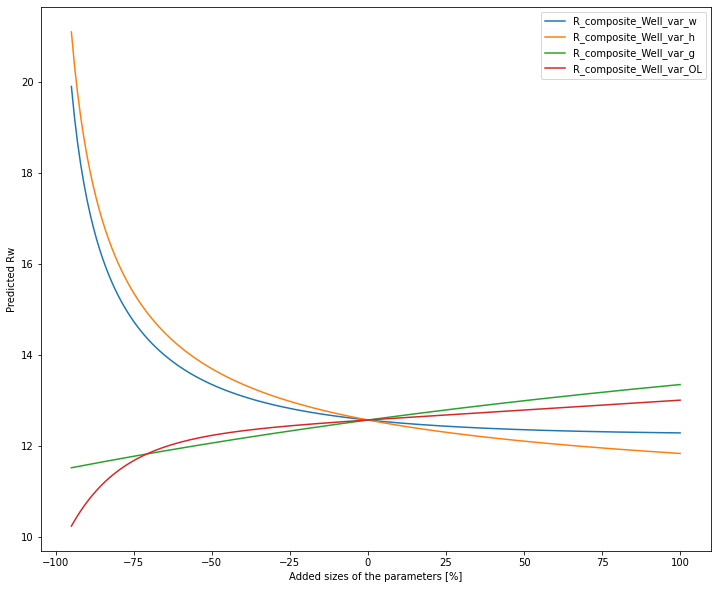

In [25]:
h_var = h_0 + (percent_add / 100 * h_0)
sigSA_Yabs_hvar = ((2*l_0/1000*h_var/1000 - 2*w_0*h_var/1000000)*0.03) + ((2*g_0/1000*l_0/1000+2*g_0/1000*h_var/1000)*0.5) + (2*w_0*h_var/1000000*0.9)
sigSA_per_sigS_Yabs_hvar = sigSA_Yabs_hvar/((2*l_0/1000*h_var/1000 - 2*w_0*h_var/1000000)+(2*g_0/1000*l_0/1000+2*g_0/1000*h_var/1000)+(2*w_0*h_var/1000000))
R_plenum_Li_var_h = -10*np.log10(w_0*h_var/1000000*((Q1*g_0/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+K1*(1-sigSA_per_sigS_Yabs_hvar)/sigSA_Yabs_hvar)))
sensitivity_plenum_Li = pd.DataFrame(
                    {"percent_add" : percent_add.tolist(), 
                        "R_composite_Well_var_h" : R_plenum_Li_var_h.tolist()}) 

w_var = w_0 + (percent_add / 100 * w_0)
d_wvar = OL_0 + w_var
l_wvar = OL_0 + 2*w_var
sigSA_Yabs_wvar = ((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)*0.03) + ((2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_var*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_wvar = sigSA_Yabs_wvar/((2*l_wvar/1000*h_0/1000 - 2*w_var*h_0/1000000)+(2*g_0/1000*l_wvar/1000+2*g_0/1000*h_0/1000)+(2*w_var*h_0/1000000))
R_plenum_Li_var_w = -10*np.log10(w_var*h_0/1000000*((Q1*g_0/1000/(d_wvar/1000)/(4*math.pi*(d_wvar/1000)**2)+K1*(1-sigSA_per_sigS_Yabs_wvar)/sigSA_Yabs_wvar)))
sensitivity_plenum_Li ['R_composite_Well_var_w'] = R_plenum_Li_var_w.tolist()

g_var = g_0 + (percent_add / 100 * g_0)
sigSA_Yabs_gvar = ((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_var/1000*l_0/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_gvar = sigSA_Yabs_gvar/((2*l_0/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_var/1000*l_0/1000+2*g_var/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Li_var_g = -10*np.log10(w_0*h_0/1000000*((Q1*g_var/1000/(d_0/1000)/(4*math.pi*(d_0/1000)**2)+K1*(1-sigSA_per_sigS_Yabs_gvar)/sigSA_Yabs_gvar)))
sensitivity_plenum_Li ['R_composite_Well_var_g'] = R_plenum_Li_var_g.tolist()

OL_var = OL_0 + (percent_add / 100 * OL_0)
d_OLvar = OL_var + w_0
l_OLvar = OL_var + 2*w_0
sigSA_Yabs_OLvar = ((2*l_OLvar/1000*h_0/1000 - 2*w_0*h_0/1000000)*0.03) + ((2*g_0/1000*l_OLvar/1000+2*g_0/1000*h_0/1000)*0.5) + (2*w_0*h_0/1000000*0.9)
sigSA_per_sigS_Yabs_OLvar = sigSA_Yabs_OLvar/((2*l_OLvar/1000*h_0/1000 - 2*w_0*h_0/1000000)+(2*g_0/1000*l_OLvar/1000+2*g_0/1000*h_0/1000)+(2*w_0*h_0/1000000))
R_plenum_Li_var_OL = -10*np.log10(w_0*h_0/1000000*((Q1*g_0/1000/(d_OLvar/1000)/(4*math.pi*(d_OLvar/1000)**2)+K1*(1-sigSA_per_sigS_Yabs_OLvar)/sigSA_Yabs_OLvar)))
sensitivity_plenum_Li ['R_composite_Well_var_OL'] = R_plenum_Li_var_OL.tolist()

sensitivity_plenum_Li.plot(figsize=(12,10),x='percent_add',y=['R_composite_Well_var_w', 'R_composite_Well_var_h', 'R_composite_Well_var_g', 'R_composite_Well_var_OL'])
plt.xlabel("Added sizes of the parameters [%]")
plt.ylabel("Predicted Rw")

#sensitivity.head()

print('w_0 = ', w_0, "mm")
print('h_0 = ', h_0, "mm")
print('g_0 = ', g_0, "mm")
print('OL_0 = ', OL_0, "mm")

print('w_var = ', w_var, "mm")